Saving processed_Arts Data.xlsx to processed_Arts Data (1).xlsx
Saving processed_BIZ DATA.xlsx to processed_BIZ DATA (1).xlsx
Saving processed_Med Data.xlsx to processed_Med Data (1).xlsx
Saving processed_Phy and math Data.xlsx to processed_Phy and math Data (1).xlsx
Saving processed_Soc Data.xlsx to processed_Soc Data (1).xlsx
Saving processed_Chem Data.xlsx to processed_Chem Data (1).xlsx
Saving processed_ECS Data.xlsx to processed_ECS Data (1).xlsx
Saving processed_Life Data.xlsx to processed_Life Data (1).xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

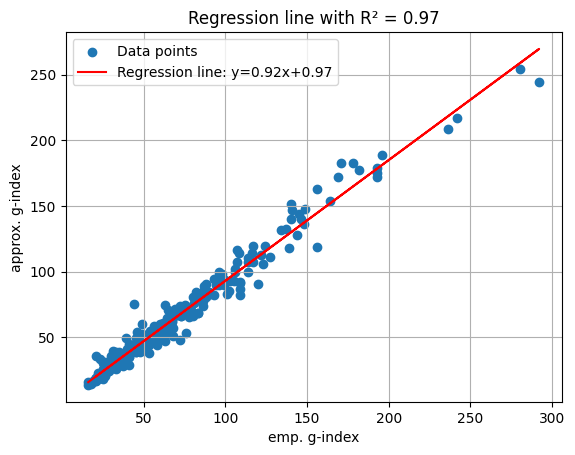

In [3]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scipy

import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from scipy.stats import linregress

def calculate_h_index(citations):
    citations_sorted = np.sort(citations)[::-1]
    h_index = np.sum(citations_sorted >= np.arange(1, len(citations_sorted) + 1))
    return h_index

def calculate_g_index_alt(citations):
    citations_sorted = np.sort(citations)[::-1]
    g_index = 0
    total_citations = 0

    for i, citation_count in enumerate(citations_sorted, start=1):
        total_citations += citation_count
        if total_citations >= i**2:
            g_index = i

    return g_index

def calculate_new_g_index(h, M):
    e = 2.71828
    new_g_index = h * (np.sqrt(np.log((4 * M) / (e * h))))
    return new_g_index

def process_excel_files(uploaded_files):
    result_rows = []

    for file_name in uploaded_files.keys():
        xls = pd.ExcelFile(file_name)

        for sheet_name in xls.sheet_names:
            df = pd.read_excel(xls, sheet_name=sheet_name)

            citations = df['Cites'].values

            M = np.max(citations)
            N = len(citations)
            h_index = calculate_h_index(citations)
            g_index = calculate_g_index_alt(citations)
            new_g_index = calculate_new_g_index(h_index, M)

            result_row = {
                'File': file_name,
                'Sheet': sheet_name,
                'M': M,
                'N': N,
                'h-index': h_index,
                'g-index': g_index,
                'new-g-index': new_g_index
            }
            result_rows.append(result_row)

    result_df = pd.DataFrame(result_rows)
    return result_df

def plot_scatter_with_regression(results_df):
    x = results_df['g-index']
    y = results_df['new-g-index']

    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    plt.scatter(x, y, label='Data points')
    plt.plot(x, slope * x + intercept, color='red', label=f'Regression line: y={slope:.2f}x+{intercept:.2f}')
    plt.xlabel('emp. g-index')
    plt.ylabel('approx. g-index')
    plt.title(f'Regression line with R² = {r_value**2:.2f}')
    plt.legend()
    plt.grid(True)
    plt.show()

uploaded = files.upload()
results_df = process_excel_files(uploaded)

output_filename = 'metrics_summary.xlsx'
results_df.to_excel(output_filename, index=False)
files.download(output_filename)

plot_scatter_with_regression(results_df)

